In [4]:
import sympy as sy


x = sy.Symbol('x')

func = 1/(1+x**2)

print("x:", type(x))
print(func)
print(diff(func, x))
print(diff(func, x).subs(x, 3))
print(diff(func, x).subs(x, 3).evalf())

x: <class 'sympy.core.symbol.Symbol'>
1/(x**2 + 1)
-2*x/(x**2 + 1)**2
-3/50
-0.0600000000000000


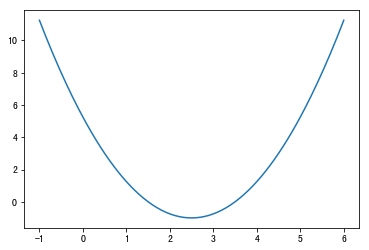

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def lossFunction(x):
    return (x-2.5)**2-1

# 在-1到6的范围内构建140个点
plot_x = np.linspace(-1,6,141)
# plot_y 是对应的损失函数值
plot_y = lossFunction(plot_x)

plt.plot(plot_x,plot_y)
plt.show()

In [7]:
def dLF(theta):
    return derivative(lossFunction, theta, dx=1e-6)

In [8]:
theta = 0.0
eta = 0.1
epsilon = 1e-6
while True:
    # 每一轮循环后，要求当前这个点的梯度是多少
    gradient = dLF(theta)
    last_theta = theta
    # 移动点，沿梯度的反方向移动步长eta
    theta = theta - eta * gradient
    # 判断theta是否达到最小值
    # 因为梯度在不断下降，因此新theta的损失函数在不断减小
    # 看差值是否达到了要求
    if(abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
        break
print(theta)
print(lossFunction(theta))

2.498732349398569
-0.9999983930619527


In [9]:
def gradient_descent(initial_theta, eta, epsilon=1e-6):
    theta = initial_theta
    theta_history.append(theta)
    while True:
        # 每一轮循环后，要求当前这个点的梯度是多少
        gradient = dLF(theta)
        last_theta = theta
        # 移动点，沿梯度的反方向移动步长eta
        theta = theta - eta * gradient
        theta_history.append(theta)
        # 判断theta是否达到损失函数最小值的位置
        if(abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
            break

def plot_theta_history():
    plt.plot(plot_x,plot_y)
    plt.plot(np.array(theta_history), lossFunction(np.array(theta_history)), color='red', marker='o')
    plt.show()

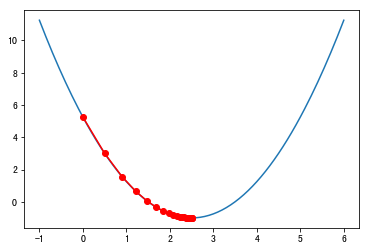

梯度下降查找次数： 35


In [10]:
eta=0.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

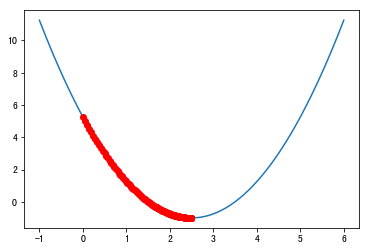

梯度下降查找次数： 310


In [11]:
eta=0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

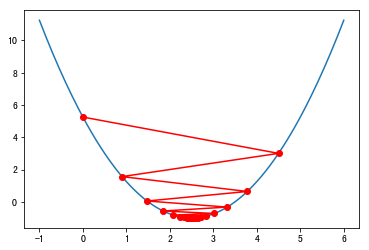

梯度下降查找次数： 35


In [12]:
eta=0.9
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

# 线性回归中的梯度下降

In [13]:
def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
    """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"

    def J(theta, X_b, y):
        try:
            return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
        except:
            return float('inf')
        
    def dJ(theta, X_b, y):
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

    def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

        theta = initial_theta
        cur_iter = 0

        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y)
            last_theta = theta
            theta = theta - eta * gradient
            if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                break

            cur_iter += 1

        return theta

    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    initial_theta = np.zeros(X_b.shape[1])
    self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

    self.intercept_ = self._theta[0]
    self.coef_ = self._theta[1:]

    return self

In [14]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 666)

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)


AttributeError: 'LinearRegression' object has no attribute 'fit_normal'

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:

lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train, )
lin_reg2.coef_

In [ ]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)
lin_reg2.score(X_test, y_test)

In [ ]:

lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)
lin_reg2.score(X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = standardScaler.transform(X_train)
lin_reg3 = LinearRegression()
lin_reg3.fit_gd(X_train_std, y_train)
X_test_std = standardScaler.transform(X_test)
lin_reg2.score(X_test, y_test)